<a href="https://colab.research.google.com/github/Rafe2001/Brain_Stroke_Prediction/blob/main/Brain_Stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Required Libraries

In [ ]:
import warnings
import numpy as npw
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data.csv")

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
cat_columns=df.select_dtypes(include=['object']).columns
print(cat_columns)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [ ]:
num_cols=df.select_dtypes(exclude=['object']).columns
print(num_cols)

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')


##Data Cleaning

In [ ]:
print(df.shape)
df.isnull().sum()

(5110, 12)


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df=df.fillna(df.median())

<ipython-input-7-42d29455c84b>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.median())


In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique().sum()

9633

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


###Statistical analysis of numerical column

In [ ]:
df.describe()               #Descriptive statistics

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.drop(columns = 'id', inplace = True)

##EDA & Feature Engineering

no     4861
yes     249
Name: stroke, dtype: int64


<Axes: xlabel='stroke', ylabel='count'>

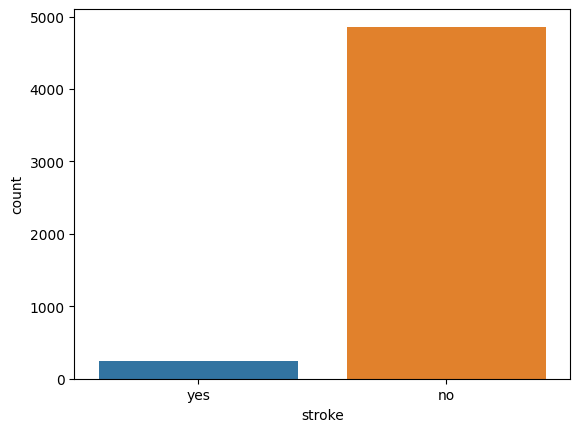

In [ ]:
df['stroke'] = df['stroke'].replace({0:'no',1:'yes'})
print(df['stroke'].value_counts())
sns.countplot(x='stroke',data=df)

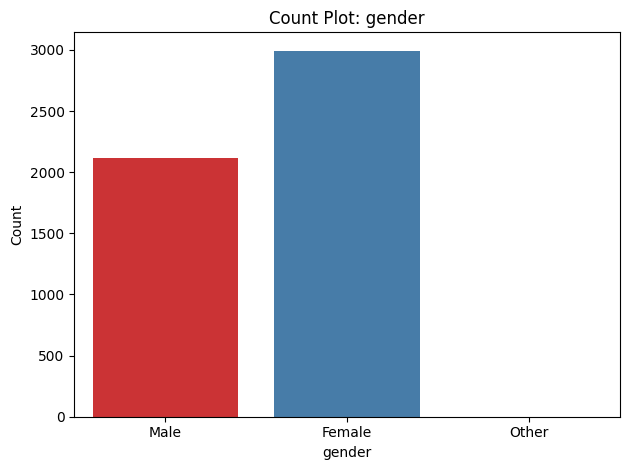

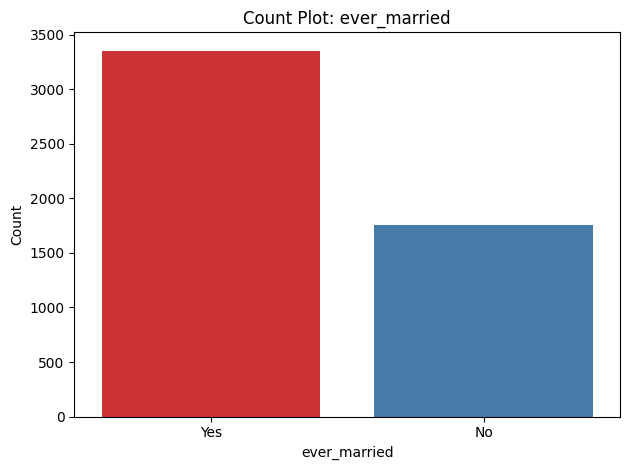

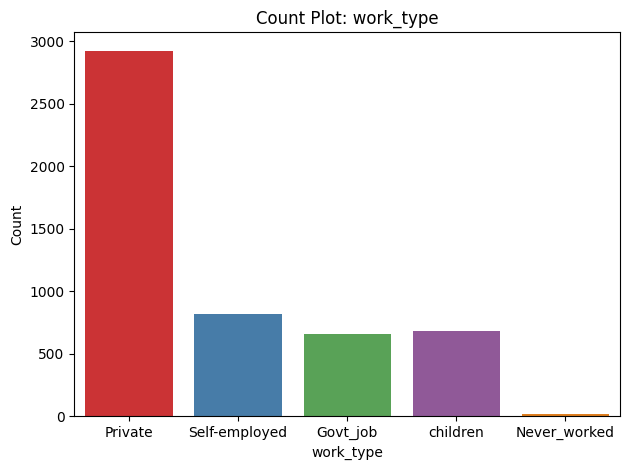

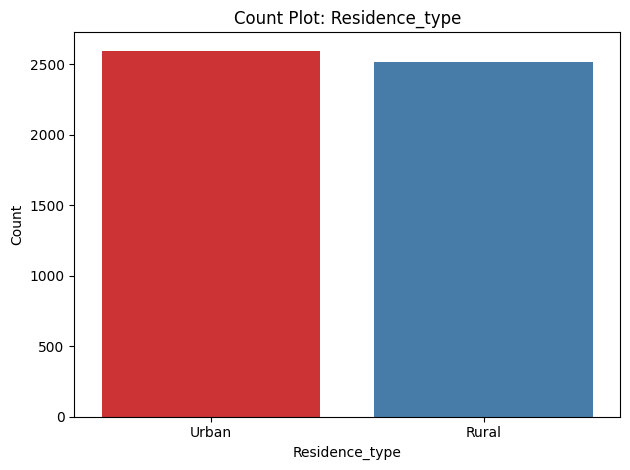

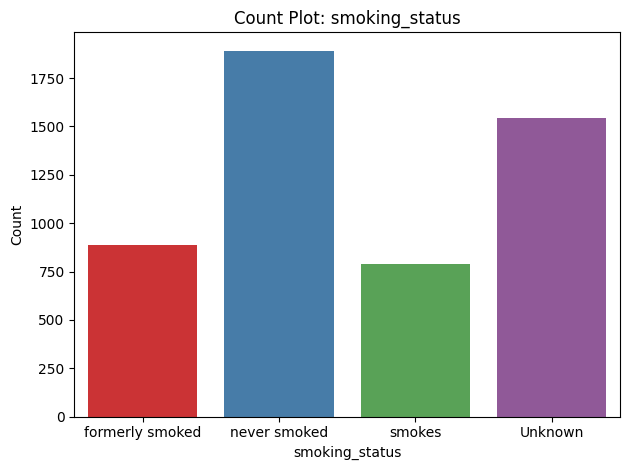

In [ ]:
cols = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']
for col in cols:
    sns.countplot(x=col, data=df, palette='Set1')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('Count Plot: {}'.format(col))
    plt.tight_layout()
    plt.show()

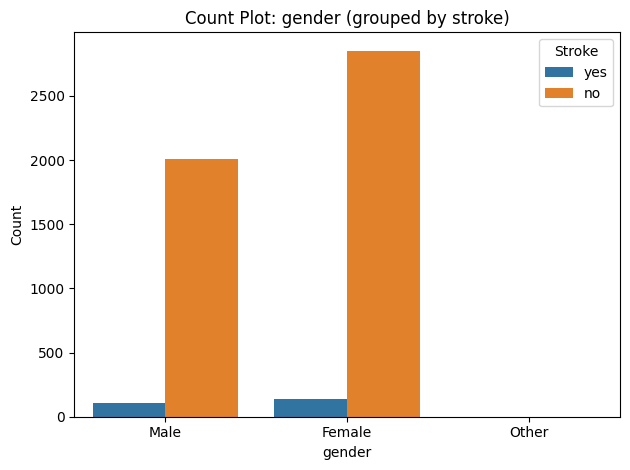

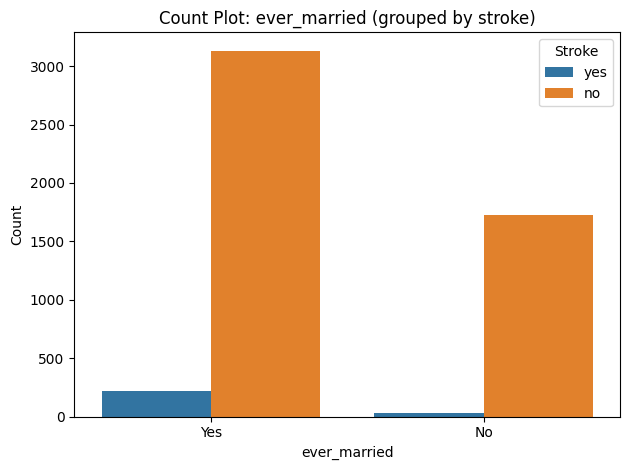

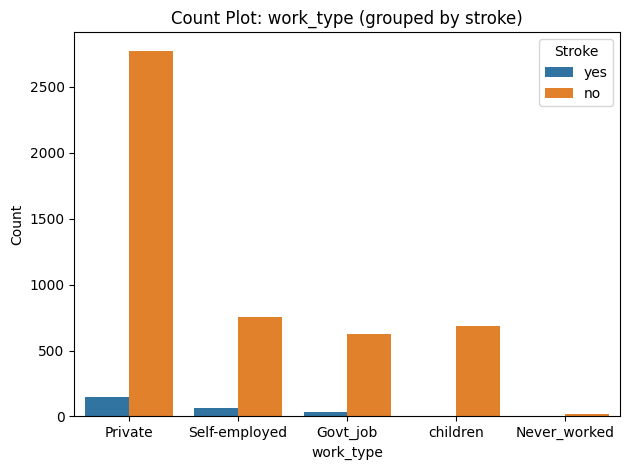

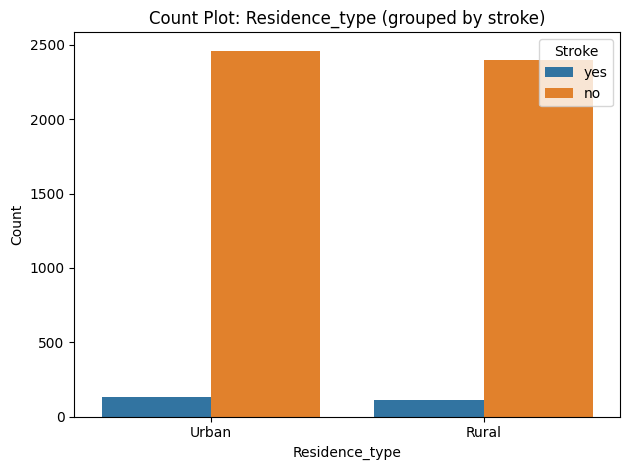

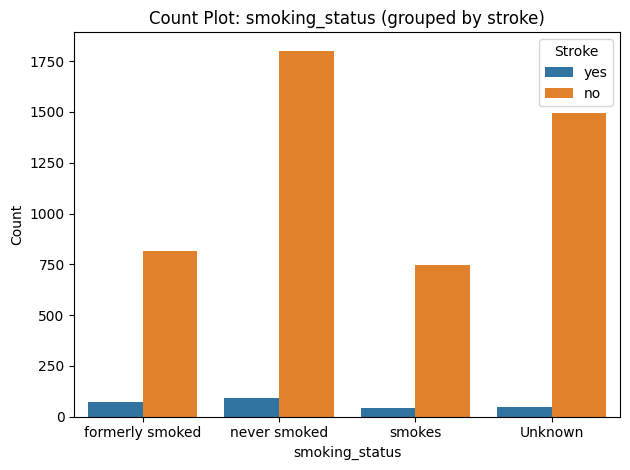

In [ ]:
cols = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']
for col in cols:
    sns.countplot(x=col, data=df, hue='stroke')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('Count Plot: {} (grouped by stroke)'.format(col))
    plt.legend(title='Stroke', loc='upper right')
    plt.tight_layout()
    plt.show()

<ipython-input-17-432fc9380219>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df, x = col, hue= 'stroke', shade= True, ax=ax[i,2], palette = 'ocean')
<ipython-input-17-432fc9380219>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df, x = col, hue= 'stroke', shade= True, ax=ax[i,2], palette = 'ocean')
<ipython-input-17-432fc9380219>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df, x = col, hue= 'stroke', shade= True, ax=ax[i,2], palette = 'ocean')


'fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))\nsns.boxplot(x=\'age\',data=df,ax = ax1)\nax1.set_title(\'Boxplot of age\')\nsns.histplot(data=df, x=\'age\', ax=ax2, bins=20, kde=True)\nax2.set_title("Age histogram")'

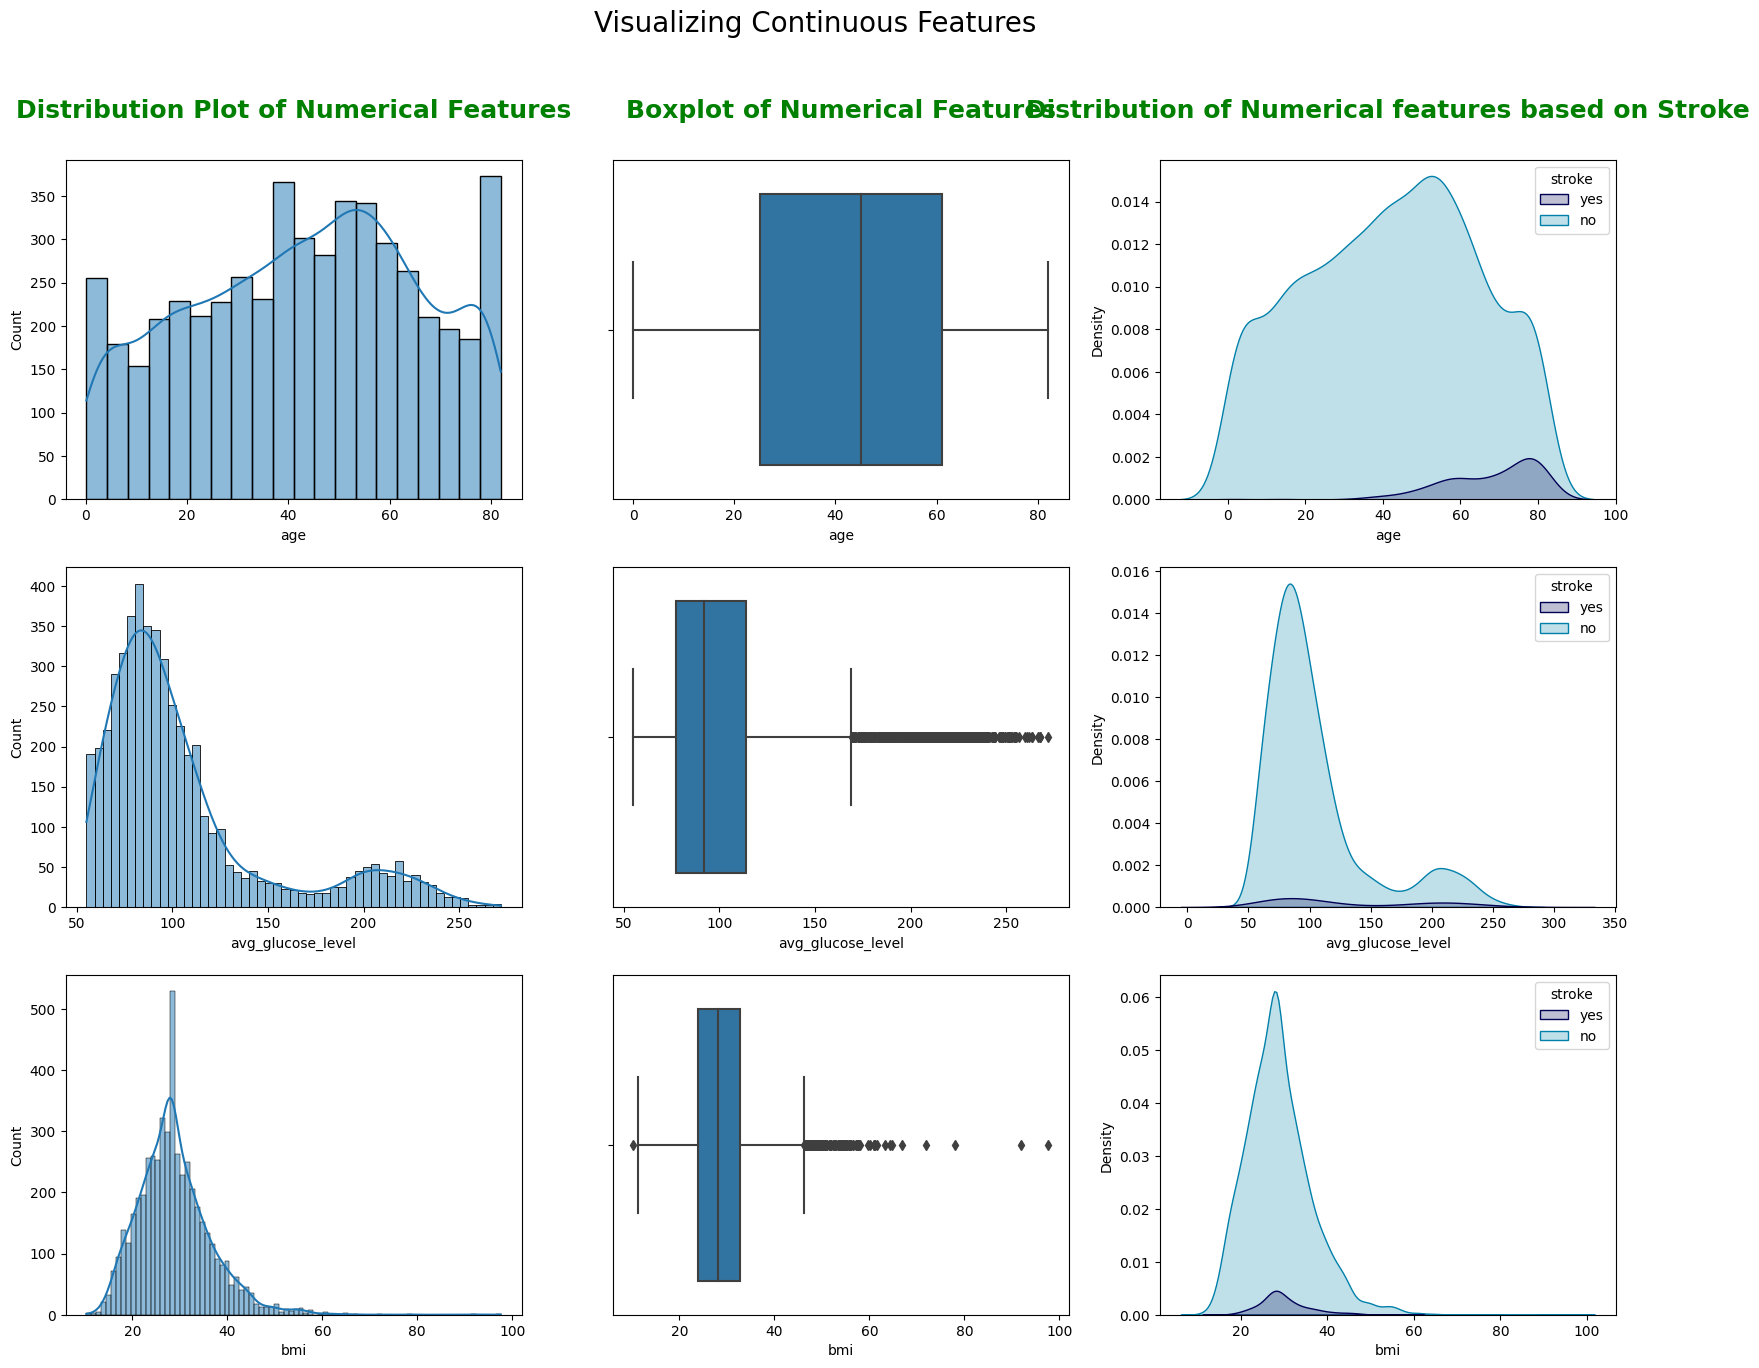

In [ ]:
cls = ['age','avg_glucose_level','bmi']
fig,ax=plt.subplots(3,3,figsize=(20,15))
for i,col in enumerate(cls):
    plt.suptitle("Visualizing Continuous Features",size=20)
    sns.histplot(df[col], ax=ax[i,0], kde=True)
    sns.boxplot(data=df, x=col, ax=ax[i,1])
    sns.kdeplot(data = df, x = col, hue= 'stroke', shade= True, ax=ax[i,2], palette = 'ocean')
    if i == 0:
        ax[0,0].set_title('Distribution Plot of Numerical Features', loc='center', y=1.1, size=18, weight='bold',color='green')
    elif i==1:
        ax[0,1].set_title('Boxplot of Numerical Features', loc='center', y=1.1, size=18, weight='bold',color='green')
    else:
        ax[0,2].set_title('Distribution of Numerical features based on Stroke', loc='center', y=1.1, size=18, weight='bold',color='green')

'''fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
sns.boxplot(x='age',data=df,ax = ax1)
ax1.set_title('Boxplot of age')
sns.histplot(data=df, x='age', ax=ax2, bins=20, kde=True)
ax2.set_title("Age histogram")'''

In [ ]:
Q3 = df['avg_glucose_level'].quantile(0.75)
Q1 = df['avg_glucose_level'].quantile(0.25)
IQR = Q3-Q1
treshold = 1.5*IQR
upper = Q3 + treshold
lower = Q1 - treshold
df = df[(df['avg_glucose_level']>lower) & (df['avg_glucose_level'] < upper)]

In [ ]:
df['avg_glucose_level'].max()

168.68

In [ ]:
Q3 = df['bmi'].quantile(0.75)
Q1 = df['bmi'].quantile(0.25)
IQR = Q3-Q1
treshold = 1.5*IQR
upper = Q3 + treshold
lower = Q1 - treshold
df = df[(df['bmi']>lower) & (df['bmi'] < upper)]
print(df['bmi'].max())
print(df['bmi'].mean())

45.5
27.744672598676704


In [ ]:
df['heart_disease'] = df['heart_disease'].replace({0:"no",1:'yes'})

<ipython-input-21-39d5333649b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['heart_disease'] = df['heart_disease'].replace({0:"no",1:'yes'})


<Axes: xlabel='heart_disease', ylabel='count'>

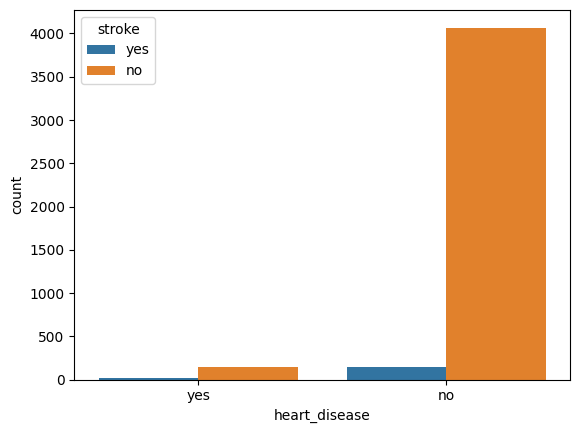

In [ ]:
sns.countplot(x='heart_disease',data=df,hue='stroke')

In [ ]:
data = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status','heart_disease','stroke']
encoder = LabelEncoder()
for i in data:
  df[i] = encoder.fit_transform(df[i])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
6,1,74.0,1,1,1,2,0,70.09,27.4,2,1
7,0,69.0,0,0,0,2,1,94.39,22.8,2,1
8,0,59.0,0,0,1,2,0,76.15,28.1,0,1
9,0,78.0,0,0,1,2,1,58.57,24.2,0,1


<Axes: >

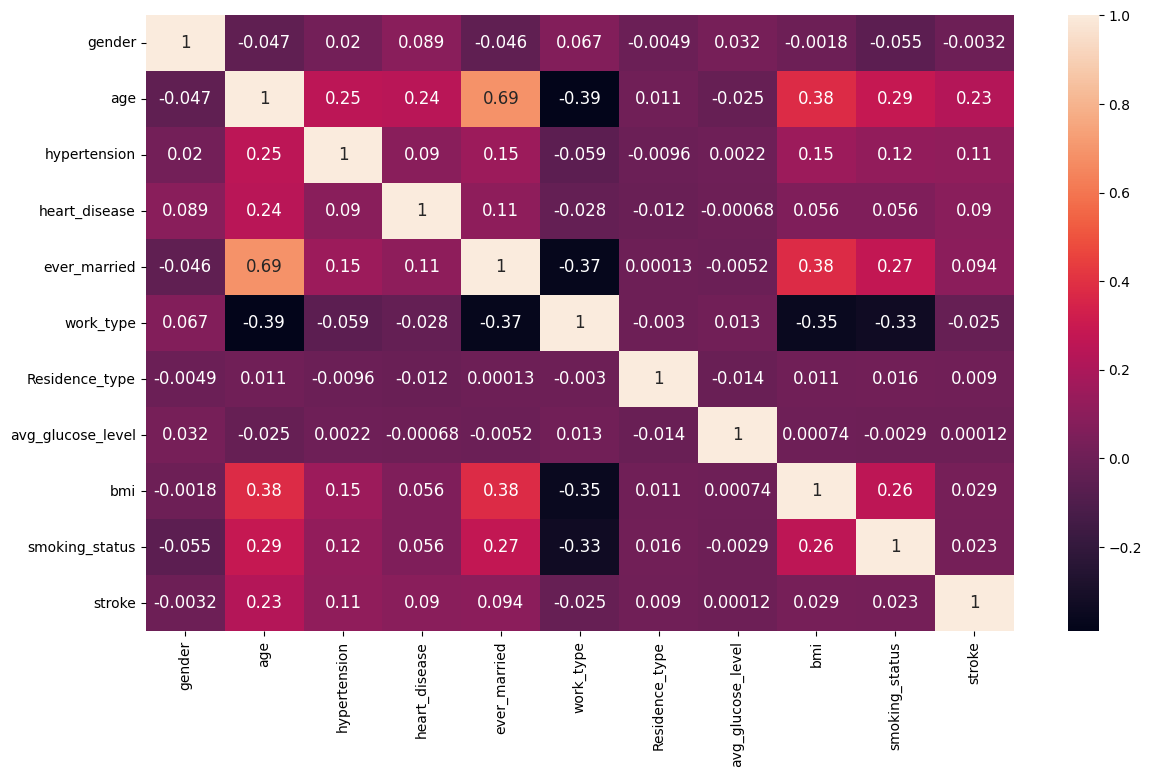

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,annot_kws = {'size':12})

In [ ]:
X = df.drop(columns=['stroke','work_type'],axis=1)
y = df['stroke']

In [ ]:
import numpy as np
ros = RandomOverSampler(sampling_strategy='minority')

X_sample, y_sample = ros.fit_resample(X, y)
print('Original Y Count: ', np.unique(y, return_counts=True))
print('OverSample Y Count: ', np.unique(y_sample, return_counts=True))

Original Y Count:  (array([0, 1]), array([4219,  164]))
OverSample Y Count:  (array([0, 1]), array([4219, 4219]))


##Model training and Model Building

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_sample,y_sample,test_size=0.2,random_state = 32, stratify = y_sample)

In [ ]:
print(X_train.shape), print(X_test.shape)

(6750, 9)
(1688, 9)


(None, None)

In [ ]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [ ]:
def algo(X_train,y_train,X_test,y_test,a):
  model=a.fit(X_train,y_train)
  y_pred_train = model.predict(X_train)
  accuracy = accuracy_score(y_train,y_pred_train)
  return accuracy

In [ ]:
model1 = RandomForestClassifier(n_estimators = 100)
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
acc1 = accuracy_score(y_test,y_pred1)
print("The testing accuracy of random forest algorithm is: ",acc1)
acc1_train = algo(X_train,y_train,X_test,y_test,model1)
print("The training accuracy of the random forest algorithm is:",acc1_train)

The testing accuracy of random forest algorithm is:  0.9958530805687204
The training accuracy of the random forest algorithm is: 1.0


In [ ]:
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
acc2 = accuracy_score(y_test,y_pred2)
print("The testing accuracy of logistic regression algorithm is: ",acc2)
acc2_train = algo(X_train,y_train,X_test,y_test,model2)
print("The training accuracy of the algorithm is:",acc2_train)

The testing accuracy of logistic regression algorithm is:  0.79739336492891
The training accuracy of the algorithm is: 0.7779259259259259


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
model5 = GaussianNB()
model5.fit(X_train,y_train)
y_pred = model5.predict(X_test)
acc5 = accuracy_score(y_test,y_pred)
print("The testing accuracy of naive bayes algorithm is: ",acc5)
acc5_train = algo(X_train,y_train,X_test,y_test,model5)
print("The training accuracy of the algorithm is:",acc5_train)

The testing accuracy of naive bayes algorithm is:  0.7233412322274881
The training accuracy of the algorithm is: 0.7281481481481481


In [ ]:
model6 = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
model6.fit(X_train,y_train)
y_pred6 = model6.predict(X_test)
acc6 = accuracy_score(y_test, y_pred6)
print("The testing accuracy of random forest algorithm is: ",acc6)
acc6_train = algo(X_train,y_train,X_test,y_test,model6)
print("The training accuracy of the algorithm is:",acc6_train)

The testing accuracy of random forest algorithm is:  0.79739336492891
The training accuracy of the algorithm is: 0.8059259259259259


In [ ]:
model7 = GradientBoostingClassifier(n_estimators=100,max_depth=3,learning_rate=0.1)
model7.fit(X_train,y_train)
y_pred7 = model7.predict(X_test)
acc7 = accuracy_score(y_test, y_pred7)
print("The testing accuracy of random forest algorithm is: ",acc7)
acc7_train = algo(X_train,y_train,X_test,y_test,model7)
print("The training accuracy of the algorithm is:",acc7_train)

The testing accuracy of random forest algorithm is:  0.8862559241706162
The training accuracy of the algorithm is: 0.8878518518518519


In [ ]:
models = {
    'Random Forest' : RandomForestClassifier(n_estimators=100),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes" : GaussianNB(),
    "Adaboost classifier" : AdaBoostClassifier(),
    "Gradient Boost": GradientBoostingClassifier()
}
accuracy_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)

# Create a DataFrame to store algorithm names and accuracy scores
results_df = pd.DataFrame(accuracy_scores.items(), columns=['Algorithm', 'Accuracy Score'])

# Sort the DataFrame by accuracy score in descending order
results_df = results_df.sort_values(by='Accuracy Score', ascending=False)

# Display the table
print(results_df)

             Algorithm  Accuracy Score
0        Random Forest        0.996445
4       Gradient Boost        0.886256
1  Logistic Regression        0.797393
3  Adaboost classifier        0.797393
2          Naive Bayes        0.723341


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}
model = RandomForestClassifier()

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

accuracy = best_model.score(X_test, y_test)
print("Best Parameters:", best_params)
print("Testing Accuracy:", accuracy)

Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'max_depth': None, 'bootstrap': False}
Testing Accuracy: 0.9976303317535545


The testing accuracy using random forest algorithm is: 99.76303317535546
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       844
           1       0.99      1.00      1.00       844

    accuracy                           1.00      1688
   macro avg       1.00      1.00      1.00      1688
weighted avg       1.00      1.00      1.00      1688

-----------------------------------------------------


<Axes: >

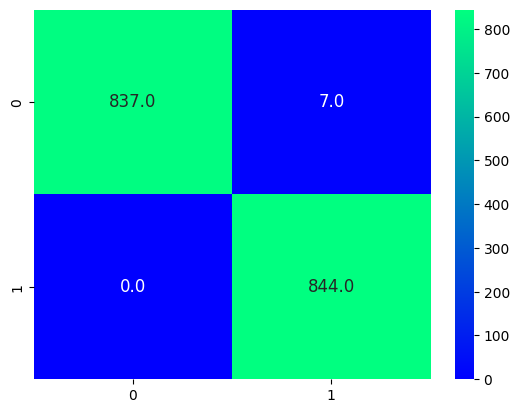

In [ ]:
print("The testing accuracy using random forest algorithm is:",accuracy*100)
cm = confusion_matrix(y_test,y_pred1)
print(classification_report(y_test,y_pred1))
print("-----------------------------------------------------")
sns.heatmap(cm,annot=True,annot_kws={'size':12},cmap='winter',fmt=".1f")

In [ ]:
import pickle
with open('model_brain.pkl', 'wb') as f:
    pickle.dump(model1, f)

In [ ]:
with open('scaling.pkl','wb') as f:
  pickle.dump(scalar, f)